In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
IMAGE_WIDTH = 1280
IMAGE_HEIGHT = 720
NUMBER_OF_LANDMARKS = 100
NUMBER_OF_SEGMENTS = 100

In [68]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,10


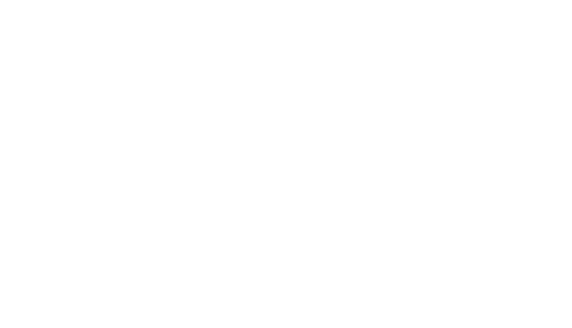

In [69]:
import numpy as np
from src.image import show_image_from_ndarray, gray2bgr

canvas = np.zeros((IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.uint8)
canvas[:] = 255
show_image_from_ndarray(canvas)

In [70]:
landmarks_xy = np.random.rand(NUMBER_OF_LANDMARKS * 2).reshape(-1, 2)
landmarks_xy[:, 0] = landmarks_xy[:, 0] * IMAGE_WIDTH
landmarks_xy[:, 1] = landmarks_xy[:, 1] * IMAGE_HEIGHT
landmarks_xy = landmarks_xy.astype(np.int16)
landmarks_xy

array([[ 253,   94],
       [1241,  309],
       [ 549,  565],
       [ 285,  594],
       [ 405,  374],
       [ 702,  700],
       [ 589,  618],
       [ 625,  612],
       [ 349,  684],
       [ 695,  116],
       [ 850,  180],
       [1148,  582],
       [ 308,  540],
       [ 124,  385],
       [ 945,  293],
       [ 499,  503],
       [ 853,  687],
       [ 571,  190],
       [ 499,  419],
       [  97,  240],
       [ 322,  388],
       [1008,  406],
       [ 786,    0],
       [   2,  102],
       [ 192,  645],
       [ 301,  479],
       [ 116,    3],
       [ 287,  566],
       [1227,   55],
       [1022,   83],
       [ 368,  717],
       [1119,  717],
       [ 218,  676],
       [ 459,  679],
       [ 246,    1],
       [ 698,  654],
       [ 422,   72],
       [1049,  510],
       [1207,  128],
       [ 462,  516],
       [ 811,  615],
       [ 705,  586],
       [ 771,   59],
       [ 231,  503],
       [ 500,  269],
       [ 184,  719],
       [ 366,  158],
       [1060,

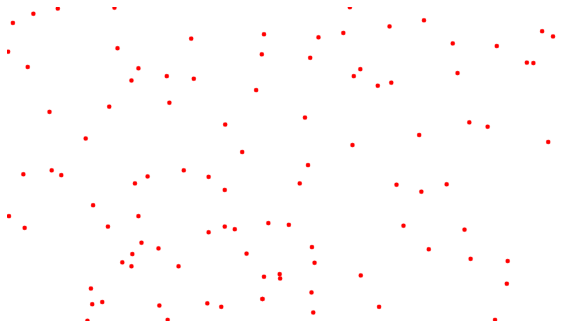

In [71]:
import cv2
canvas_dots = np.zeros_like(canvas)
canvas_dots[:] = 255

for landmark in landmarks_xy:
    cv2.circle(canvas_dots,
           center=tuple(landmark),
           radius=5,
           color=(0, 0, 255),
           thickness=-1)

show_image_from_ndarray(canvas_dots)

In [72]:
import itertools
landmark_pair_candidates = np.asarray(list(itertools.combinations(np.arange(NUMBER_OF_LANDMARKS), 2)))
landmark_pairs = landmark_pair_candidates.take(np.random.choice(landmark_pair_candidates.shape[0], NUMBER_OF_SEGMENTS, replace=False), axis=0)
print(landmark_pairs)

[[13 84]
 [46 76]
 [41 93]
 [23 40]
 [ 7 69]
 [24 77]
 [62 82]
 [26 62]
 [33 51]
 [30 32]
 [81 88]
 [98 99]
 [52 77]
 [92 95]
 [58 81]
 [36 53]
 [17 68]
 [18 28]
 [40 52]
 [13 57]
 [57 83]
 [25 78]
 [ 4 86]
 [33 95]
 [40 47]
 [45 78]
 [29 40]
 [61 78]
 [19 52]
 [49 98]
 [19 44]
 [58 72]
 [82 89]
 [71 85]
 [12 57]
 [24 62]
 [20 75]
 [11 76]
 [ 4 22]
 [61 94]
 [27 45]
 [29 68]
 [12 94]
 [40 86]
 [36 75]
 [ 9 97]
 [ 1 86]
 [37 62]
 [20 41]
 [59 68]
 [ 9 36]
 [67 70]
 [95 99]
 [55 99]
 [61 63]
 [15 46]
 [18 29]
 [18 24]
 [79 90]
 [67 83]
 [32 51]
 [79 98]
 [80 94]
 [51 65]
 [10 83]
 [48 86]
 [33 54]
 [47 94]
 [51 60]
 [ 6 44]
 [53 73]
 [ 0 60]
 [72 83]
 [24 60]
 [ 4 47]
 [75 87]
 [87 98]
 [33 35]
 [25 80]
 [17 72]
 [20 67]
 [54 79]
 [64 70]
 [56 83]
 [57 58]
 [34 51]
 [ 4 66]
 [91 99]
 [65 74]
 [ 4 51]
 [ 7 88]
 [42 73]
 [ 2 19]
 [40 88]
 [35 71]
 [29 77]
 [10 81]
 [19 94]
 [52 73]
 [49 55]]


In [73]:
from typing import Tuple


def calculate_slope(x0: float, y0: float, x1: float, y1: float, epsilon: float = 10e-8) -> float:
    return (y1 - y0) / (x1 - x0 + epsilon)


def draw_full_line(image: np.ndarray, point_1: Tuple[int], point_2: Tuple[int], color=(0, 0, 0), thickness=2):
    assert (len(image.shape) == 3) and (image.shape[2] == 3)
    image_with_line = image.copy()

    image_height, image_width, _ = image.shape
    point_end_upper = np.asarray([0, 0], dtype=np.int16)
    point_end_lower = np.asarray([image_width, image_height], dtype=np.int16)

    slope = calculate_slope(point_1[0], point_1[1], point_2[0], point_2[1])
    point_end_upper[1] = -(point_1[0] - point_end_upper[0]) * slope + point_1[1]
    point_end_lower[1] = -(point_2[0] - point_end_lower[0]) * slope + point_2[1]

    cv2.line(image_with_line, (point_end_upper), point_end_lower, color=color, thickness=thickness, lineType=cv2.LINE_AA)
    return image_with_line


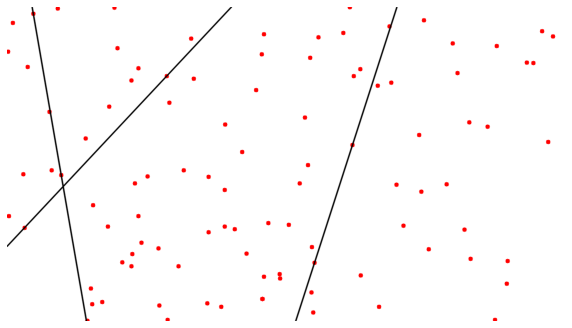

In [74]:
canvas_lines_and_dots = canvas_dots.copy()

for i in np.arange(3):
    canvas_lines_and_dots = draw_full_line(
        canvas_lines_and_dots, landmarks_xy[landmark_pairs[i, 0], :], landmarks_xy[landmark_pairs[i, 1], :]
    )

show_image_from_ndarray(canvas_lines_and_dots)


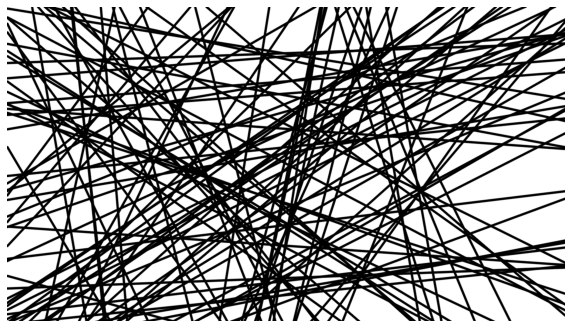

In [75]:
from src.image import save_image

canvas_lines = np.zeros_like(canvas_dots)
canvas_lines[:] = 255

for i in range(NUMBER_OF_SEGMENTS):
    canvas_lines = draw_full_line(
        canvas_lines,
        landmarks_xy[landmark_pairs[i, 0], :],
        landmarks_xy[landmark_pairs[i, 1], :],
        color=(0, 0, 0),
        thickness=3,
    )
show_image_from_ndarray(canvas_lines)
save_image("lines.png", canvas_lines)